In [363]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import os
import imageio.v2 as imageio

In [364]:
# Load the OSCAT wind dataset 
dataset = xr.open_dataset('meridonal-data/m3.nc')
dataset2= xr.open_dataset('zonal-data/z3.nc') 

In [365]:
# Print information about the dataset
print(dataset)

print(dataset2)

<xarray.Dataset>
Dimensions:    (LONGITUDE: 720, LATITUDE: 360, T1DAY: 1)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * LATITUDE   (LATITUDE) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * T1DAY      (T1DAY) datetime64[ns] 2010-02-01
Data variables:
    V          (T1DAY, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:         PyFerret V7.65 (optimized) 12-Nov-23
    Conventions:     CF-1.6
    CDI:             Climate Data Interface version 1.6.2 (http://code.zmaw.d...
    CDO:             Climate Data Operators version 1.6.2 (http://code.zmaw.d...
    FERRET_comment:  File written via LAS. Attributes are inherited from orig...
<xarray.Dataset>
Dimensions:    (LONGITUDE: 720, LATITUDE: 360, T1DAY: 1)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * LATITUDE   (LATITUDE) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * T1DAY      (T1DAY) datetime64[ns] 2010-02-01
Dat

In [366]:
# Extract the date
date_str = str(dataset['T1DAY'].values[0])
formatted_date = date_str.split('T')[0]  # Extracting only the date part

In [367]:

# Extract zonal and meridional wind data
uwnd = dataset2['U'].squeeze()  # Squeeze removes singleton dimensions
vwnd = dataset['V'].squeeze()

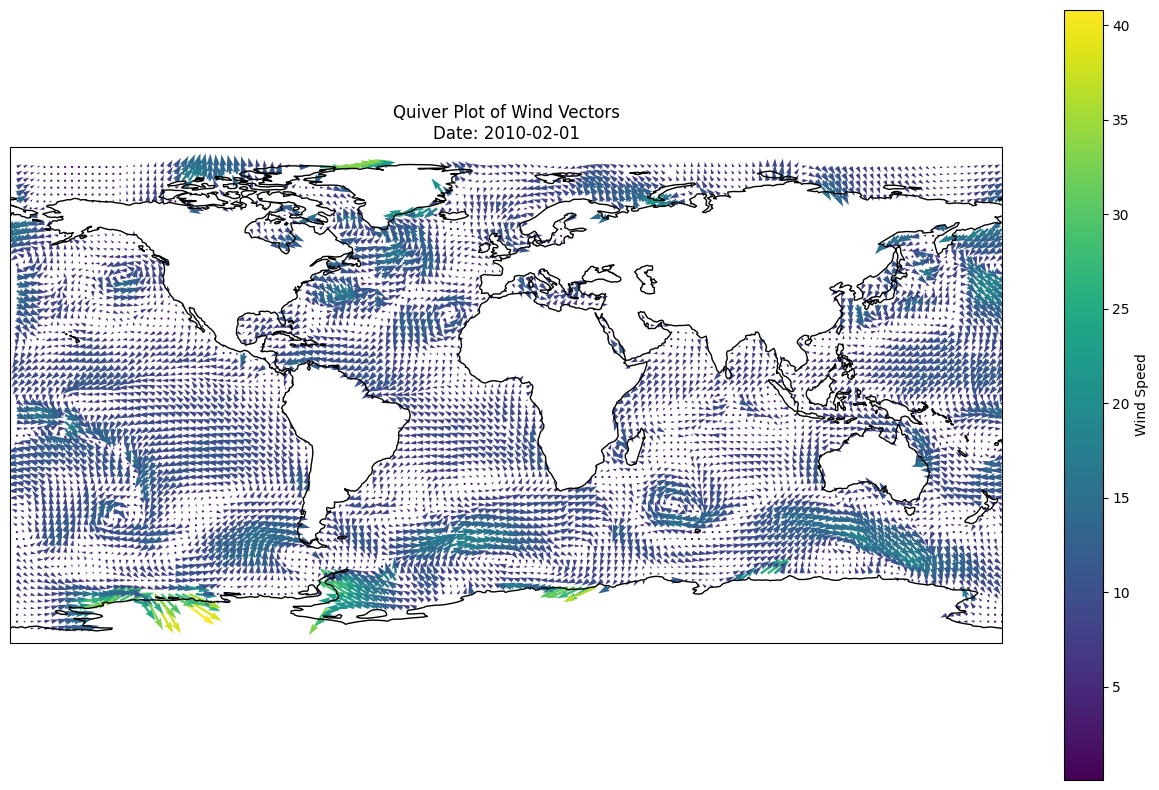

In [369]:
# Specify the folder to save the plot
output_folder = './images'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Save the plot to the specified folder
output_filename = 'file_name.png'
output_path = os.path.join(output_folder, output_filename)
fig.savefig(output_path)

In [370]:
# Close the dataset
dataset.close()
dataset2.close()


In [371]:
# Directory where your image frames are stored
frames_directory = './images/'

# Ensure the frames directory exists
os.makedirs(frames_directory, exist_ok=True)

# List of image file paths for each frame
frames = ['oscat_wind_plot_1.png', 'oscat_wind_plot_2.png', 'oscat_wind_plot_3.png']  # Replace with your frame filenames

# Create GIF filename
gif_filename = 'Quiver.gif'

# Additional parameters for creating the GIF
gif_duration = 0.4  # Duration of each frame in seconds
fps = 2  # Frames per second (speed of the GIF)

# Create the GIF with looping
with imageio.get_writer(gif_filename, duration=gif_duration, fps=fps, loop=0) as writer:
    for frame in frames:                       
        image_path = os.path.join(frames_directory, frame)
        img = imageio.imread(image_path)
        writer.append_data(img)

print(f'GIF saved at: {gif_filename}')


GIF saved at: Quiver.gif
